In [1]:
# A demo for segmentation on hcg62 by pycode levelset

In [2]:
import numpy as np
import os
import time
from astropy.io import fits

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec

In [4]:
import utils
from levelset import LevelSet

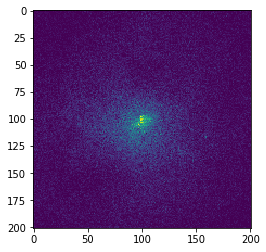

In [5]:
# load image and cut
filepath = "../matcode/data/hcg62.fits"
with fits.open(filepath) as h:
    img = h[0].data
    
# cut
img = img[374-100:375+100,374-100:375+100]
plt.imshow(img)

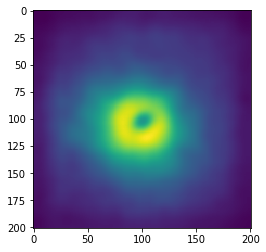

In [6]:
# Preprocessing
img_um = utils.getUnsharpMasking(img,sigma1=5, sigma2=20,kershape=(50,50))
plt.imshow(img_um)

In [7]:
# Init the levelset function
mu = 0.1
nu = 0.0
lambda1 = 1.0
lambda2 = 1.0
niter = 200
phi_total = 1e-3
dt = 0.5
ls = LevelSet(imgshape=img.shape, mu=mu, nu=nu, 
              lambda1=lambda1, lambda2=lambda2, dt=dt)

In [8]:
# Do segmentation
ls.calcSegmentation(img_um, niter=niter, phi_total=1e-3,
                    normflag=True, logflag=False)

[2018-01-15: 17:15:53] Iter: 0	 PhiDiffNorm: 56891.583
[2018-01-15: 17:15:58] Iter: 5	 PhiDiffNorm: 1351.516
[2018-01-15: 17:16:02] Iter: 10	 PhiDiffNorm: 1507.421
[2018-01-15: 17:16:07] Iter: 15	 PhiDiffNorm: 1707.004
[2018-01-15: 17:16:12] Iter: 20	 PhiDiffNorm: 1974.204
[2018-01-15: 17:16:16] Iter: 25	 PhiDiffNorm: 2356.481
[2018-01-15: 17:16:21] Iter: 30	 PhiDiffNorm: 2966.774
[2018-01-15: 17:16:26] Iter: 35	 PhiDiffNorm: 4181.412
[2018-01-15: 17:16:31] Iter: 40	 PhiDiffNorm: 8990.471
[2018-01-15: 17:16:35] Iter: 45	 PhiDiffNorm: 51978.567
[2018-01-15: 17:16:40] Iter: 50	 PhiDiffNorm: 13.801
[2018-01-15: 17:16:45] Iter: 55	 PhiDiffNorm: 11.353
[2018-01-15: 17:16:49] Iter: 60	 PhiDiffNorm: 10.417
[2018-01-15: 17:16:54] Iter: 65	 PhiDiffNorm: 9.973
[2018-01-15: 17:16:59] Iter: 70	 PhiDiffNorm: 9.793
[2018-01-15: 17:17:04] Iter: 75	 PhiDiffNorm: 9.813
[2018-01-15: 17:17:08] Iter: 80	 PhiDiffNorm: 10.054
[2018-01-15: 17:17:13] Iter: 85	 PhiDiffNorm: 10.647
[2018-01-15: 17:17:18] Iter: 

/home/mzx/.local/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'level'
  s)


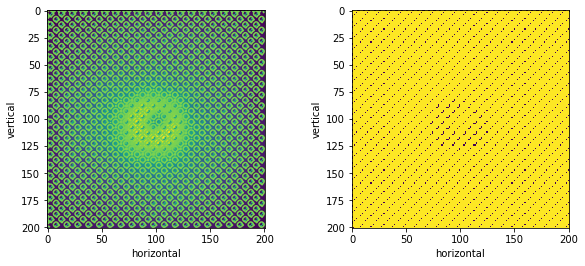

In [9]:
# Display result
ls.drawResult(img_um)